## Data Preprocessing: The Titanic Dataset Exploration


### Introduction to Data Preprocessing

Data preprocessing is the heart of any machine learning pipeline, capable of magnifying accuracy when done right or leading to poor performance when overlooked. The quality of the output of any machine learning model is directly proportional to the quality of input data. Hence the Golden Rule, "Garbage In, Garbage Out."

In simple terms, the goal of data preprocessing is to cleanse, transform, and format the raw data into a structure that makes it ready for machine learning algorithms. Choosing the right techniques under preprocessing often depends on the specifics of your data, as such, there is no "one-size-fits-all" strategy.

The section today works like an introduction to this broad ocean of skills and sets the foundation for how you'll approach datasets in ensuing lessons.

### Overview of the Titanic Dataset

Having understood the concept of preprocessing, it's time to roll up our sleeves and get our hands dirty with the Titanic dataset. We aim to understand the data structure and its characteristics.

The Titanic dataset comes pre-packaged in the Seaborn library, a visualization library in Python. Let's go ahead and load the dataset.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# paths to datasets
train_path = r"C:\Users\Zakaria-Laptop\FirstStepWithGit\data\train.csv"
test_path = r"C:\Users\Zakaria-Laptop\FirstStepWithGit\data\test.csv"
gender_path = r"C:\Users\Zakaria-Laptop\FirstStepWithGit\data\gender_submission.csv"


In [2]:
def read_data(path):
    return pd.read_csv(path, sep=",")

train_df = read_data(train_path)
test_df = read_data(test_path)
gender_df = read_data(gender_path)

In [5]:
print(train_df.info())
print(train_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

In [6]:
print(train_df.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [12]:
train_df["Age"].fillna(train_df["Age"].median(), inplace=True)
train_df = train_df.drop("Cabin", axis=1, errors="ignore")

In [13]:
print(train_df.isna().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64


In [24]:
print("----- La fréquence de chaque valeur est:")
print()
for elm in train_df["Embarked"].unique():
    freq = len(train_df[train_df["Embarked"] == elm])/len(train_df)
    print(f"frequency of {elm} is: {freq*100:.2f}%")

train_df["Embarked"].fillna("S", inplace=True)

----- La fréquence de chaque valeur est:

frequency of S is: 72.28%
frequency of C is: 18.86%
frequency of Q is: 8.64%
frequency of nan is: 0.00%


In [25]:
print(train_df.isna().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


### Outlier Detection and Handling in the Titanic Dataset

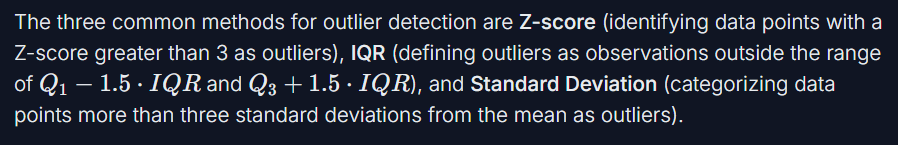

Let's now understand these methods better and see how we can apply Z-score, IQR, and Standard Deviation for outlier detection:

Z-score: It describes a data point's relationship to the mean of a group of data points. Z-score is measured in terms of standard deviations from the mean. If a Z-score is 0.0, it indicates that the data point's score is identical to the mean score. A Z-score of 1.0 represents a value that is one standard deviation from the mean. Z-scores may be positive or negative, with a positive value indicating the score is above the mean and a negative score indicating it is below the mean.

In [28]:
# Outlier with z_score
sub_data = train_df["Fare"]
mean = sub_data.mean()
std = sub_data.std()
z_score = (sub_data-mean)/std

outlier = sub_data[np.abs(z_score)>3]

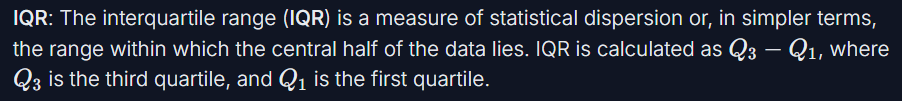

In [32]:
# Outlier with IQR
Q1 = train_df["Fare"].quantile(0.25)
Q3 = train_df["Fare"].quantile(0.75)
IQR = Q3 - Q1

bounder_inf = Q1 - 1.5*IQR
bounder_sup = Q3 + 1.5*IQR
outliers = train_df["Fare"][(train_df["Fare"]>Q3) | (train_df["Fare"]<Q1)]
outliers

0       7.2500
1      71.2833
3      53.1000
6      51.8625
13     31.2750
        ...   
878     7.8958
879    83.1583
881     7.8958
884     7.0500
890     7.7500
Name: Fare, Length: 445, dtype: float64

### Handling Outliers

After identifying outliers, we'll need to decide on the best strategy for handling them, such as:

Dropping: If the outlier does not add valuable information or is significantly skewing our data, one option to consider is dropping the outlier.

Capping: We could also consider replacing the outlier value with a certain maximum and/or minimum value.

Transforming: Techniques such as log transformations are especially effective when dealing with skewed data. This type of transformation can reduce the impact of the outliers.

In [34]:
# Drop rows with missing 'age' values
titanic_df = train_df.dropna(subset=['Age'])

# Calculate the upper bound for 'age'
Q1 = titanic_df['Age'].quantile(0.25)
Q3 = titanic_df['Age'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

# Cap the outliers for 'age'
titanic_df['Age'] = np.where(titanic_df['Age'] > upper_bound, upper_bound, titanic_df['Age'])

# Calculate the upper bound for 'fare'
Q1 = titanic_df['Fare'].quantile(0.25)
Q3 = titanic_df['Fare'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

# Cap the outliers for 'fare'
titanic_df['Fare'] = np.where(titanic_df['Fare'] > upper_bound, upper_bound, titanic_df['Fare'])

### Understanding Data Transformation

Data transformation is at the heart of data analysis and machine learning. It's about converting raw data into a format that's amenable to machine learning models and improving their performance. To illustrate better, imagine you have a dataset containing passengers' ages and incomes. Age could range from 1 to 90, while income ranges from 1000 to 90000. Notice how different these scales are? To reduce the bias in machine learning models due to these vastly differing scales, we would normalize the features with numerical scaling.

On the other hand, we may have categorical features like the 'Embarked' port in the Titanic dataset. Machine learning models don't handle categorical data well, so we need to convert them into a numeric format through One-Hot Encoding.

Let's have a quick look at an example DataFrame before any transformation.

In [50]:
example_data = pd.DataFrame({
    'age': [23, 45, 56, 78, 21],
    'income': [5000, 7000, 11000, 8000, 7600],
    'embarked': ['S', 'C', 'Q', 'S', 'S']
})
print("Before Transformation:\n", example_data)

Before Transformation:
    age  income embarked
0   23    5000        S
1   45    7000        C
2   56   11000        Q
3   78    8000        S
4   21    7600        S


In [51]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
example_data[["age", "income"]] = scaler.fit_transform(example_data[["age", "income"]])
print('After numerical feature scaling:\n', example_data[['age','income']].head())


After numerical feature scaling:
         age    income
0  0.035088  0.000000
1  0.421053  0.333333
2  0.614035  1.000000
3  1.000000  0.500000
4  0.000000  0.433333


In [52]:
example_data = pd.get_dummies(example_data, columns=["embarked"], dtype=int)

In [53]:
example_data

,age,income,embarked_C,embarked_Q,embarked_S
0,0.035088,0.000000,0,0,1
1,0.421053,0.333333,1,0,0
2,0.614035,1.000000,0,1,0
3,1.000000,0.500000,0,0,1
4,0.000000,0.433333,0,0,1
